/home/yang/anaconda3/lib/python3.9/site-packages/gym/utils/passive_env_checker.py:97: UserWarning: WARN: We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html
  logger.warn(


0
Episode:     0, average reward: -200.0, current epsilon: 1.00
1000
Episode:  1000, average reward: -200.0, current epsilon: 0.92
2000
Episode:  2000, average reward: -200.0, current epsilon: 0.84
3000
Episode:  3000, average reward: -200.0, current epsilon: 0.76
4000
Episode:  4000, average reward: -200.0, current epsilon: 0.68
5000
Episode:  5000, average reward: -200.0, current epsilon: 0.60
we made it on episode 5866
6000
Episode:  6000, average reward: -200.0, current epsilon: 0.52
we made it on episode 6279
we made it on episode 6284
we made it on episode 6413
we made it on episode 6582
we made it on episode 6595
we made it on episode 6598
we made it on episode 6606
we made it on episode 6633
we made it on episode 6642
we made it on episode 6685
we made it on episode 6708
we made it on episode 6723
we made it on episode 6727
we made it on episode 6754
we made it on episode 6758
we made it on episode 6766
we made it on episode 6768
we made it on episode 6954
we made it on episode

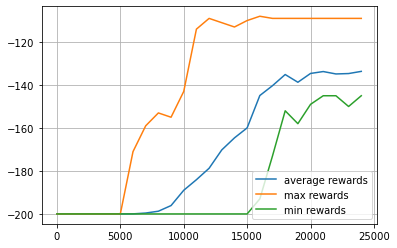

In [1]:
# 以下代码在实现训练Q表的同时，记录训练过程中各个参数的变化情况。

#  作者：Leon小草办 https://www.bilibili.com/read/cv17294975 出处：bilibili

import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make("MountainCar-v0")

# Q-Learning settings
LEARNING_RATE = 0.1
DISCOUNT = 0.95
EPISODES = 25000

SHOW_EVERY = 1000

# Exploration settings
epsilon = 1  # not a constant, qoing to be decayed
START_EPSILON_DECAYING = 1
END_EPSILON_DECAYING = EPISODES//2
epsilon_decay_value = epsilon/(END_EPSILON_DECAYING - START_EPSILON_DECAYING)

DISCRETE_OS_SIZE = [20, 20]
discrete_os_win_size = (env.observation_space.high - env.observation_space.low)/DISCRETE_OS_SIZE

def get_discrete_state(state):
    discrete_state = (state - env.observation_space.low)/discrete_os_win_size
    return tuple(discrete_state.astype(np.int64))  # we use this tuple to look up the 3 Q values for the available actions in the q-table

q_table = np.random.uniform(low=-2, high=0, size=(DISCRETE_OS_SIZE + [env.action_space.n]))

# 用以记录每个episode中小循环reward累计值
ep_rewards = []
# 用以记录每n个episode中，这n次小循环reward累计值的平均值、最大值和最小值
aggr_ep_rewards = {'ep': [], 'avg': [], 'max': [], 'min': []}

for episode in range(EPISODES):
    # 每个episode都要初始化episode_reward，用以在小循环中累计reward
    episode_reward = 0

    state = env.reset()
    discrete_state = get_discrete_state(state)

    if episode % SHOW_EVERY == 0:
        render = True
        print(episode)
    else:
        render = False

    done = False
    while not done:
        if np.random.random() > epsilon:
            # Get action from Q table
            action = np.argmax(q_table[discrete_state])
        else:
            # Get random action
            action = np.random.randint(0, env.action_space.n)

        new_state, reward, done, _ = env.step(action)

        # 小循环中累计reward
        episode_reward += reward

        new_discrete_state = get_discrete_state(new_state)

        # If simulation did not end yet after last step - update Q table
        if not done:

            # Maximum possible Q value in next step (for new state)
            max_future_q = np.max(q_table[new_discrete_state])

            # Current Q value (for current state and performed action)
            current_q = q_table[discrete_state + (action,)]

            # And here's our equation for a new Q value for current state and action
            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)

            # Update Q table with new Q value
            q_table[discrete_state + (action,)] = new_q

        # Simulation ended (for any reson) - if goal position is achived - update Q value with reward directly
        elif new_state[0] >= env.goal_position:
            q_table[discrete_state + (action,)] = 0
            print("we made it on episode {}".format(episode))

        discrete_state = new_discrete_state

        if render:
            # env.render()
            pass

    # Decaying is being done every episode if episode number is within decaying range
    if END_EPSILON_DECAYING >= episode >= START_EPSILON_DECAYING:
        epsilon -= epsilon_decay_value


    # 记录每个episode的小循环reward累计值
    ep_rewards.append(episode_reward)
    # 求平均、最大和最小的reward累计值，每SHOW_EVERY次求一次
    if not episode % SHOW_EVERY:
        average_reward = sum(ep_rewards[-SHOW_EVERY:]) / len(ep_rewards[-SHOW_EVERY:])
        aggr_ep_rewards['ep'].append(episode)
        aggr_ep_rewards['avg'].append(average_reward)
        aggr_ep_rewards['max'].append(max(ep_rewards[-SHOW_EVERY:]))
        aggr_ep_rewards['min'].append(min(ep_rewards[-SHOW_EVERY:]))
        print(f'Episode: {episode:>5d}, average reward: {average_reward:>4.1f}, current epsilon: {epsilon:>1.2f}')

env.close()
# np.save(path, q_table) # path自己指定，写在这个位置表示只记录最后一次的Q表，也可以写在大循环中，指定条件来保存自己想要的Q表

# 画图
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['avg'], label="average rewards")
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['max'], label="max rewards")
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['min'], label="min rewards")
plt.legend(loc=4)
plt.grid(True)
plt.show()


SHOW_EVERY=1000时的结果图如下所示  
SHOW_EVERY=500时的结果图如下所示  
SHOW_EVERY=50时的结果图如下所示  
SHOW_EVERY的取值也很重要。 

0
Episode:     0, average reward: -200.0, current epsilon: 1.00
50
Episode:    50, average reward: -200.0, current epsilon: 1.00
100
Episode:   100, average reward: -200.0, current epsilon: 0.99
150
Episode:   150, average reward: -200.0, current epsilon: 0.99
200
Episode:   200, average reward: -200.0, current epsilon: 0.98
250
Episode:   250, average reward: -200.0, current epsilon: 0.98
300
Episode:   300, average reward: -200.0, current epsilon: 0.98
350
Episode:   350, average reward: -200.0, current epsilon: 0.97
400
Episode:   400, average reward: -200.0, current epsilon: 0.97
450
Episode:   450, average reward: -200.0, current epsilon: 0.96
500
Episode:   500, average reward: -200.0, current epsilon: 0.96
550
Episode:   550, average reward: -200.0, current epsilon: 0.96
600
Episode:   600, average reward: -200.0, current epsilon: 0.95
650
Episode:   650, average reward: -200.0, current epsilon: 0.95
700
Episode:   700, average reward: -200.0, current epsilon: 0.94
750
Episode: 

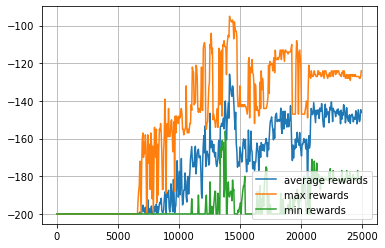

In [2]:
# 以下代码在实现训练Q表的同时，记录训练过程中各个参数的变化情况。

#  作者：Leon小草办 https://www.bilibili.com/read/cv17294975 出处：bilibili

import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make("MountainCar-v0")

# Q-Learning settings
LEARNING_RATE = 0.1
DISCOUNT = 0.95
EPISODES = 25000

SHOW_EVERY = 50

# Exploration settings
epsilon = 1  # not a constant, qoing to be decayed
START_EPSILON_DECAYING = 1
END_EPSILON_DECAYING = EPISODES//2
epsilon_decay_value = epsilon/(END_EPSILON_DECAYING - START_EPSILON_DECAYING)

DISCRETE_OS_SIZE = [20, 20]
discrete_os_win_size = (env.observation_space.high - env.observation_space.low)/DISCRETE_OS_SIZE

def get_discrete_state(state):
    discrete_state = (state - env.observation_space.low)/discrete_os_win_size
    return tuple(discrete_state.astype(np.int64))  # we use this tuple to look up the 3 Q values for the available actions in the q-table

q_table = np.random.uniform(low=-2, high=0, size=(DISCRETE_OS_SIZE + [env.action_space.n]))

# 用以记录每个episode中小循环reward累计值
ep_rewards = []
# 用以记录每n个episode中，这n次小循环reward累计值的平均值、最大值和最小值
aggr_ep_rewards = {'ep': [], 'avg': [], 'max': [], 'min': []}

for episode in range(EPISODES):
    # 每个episode都要初始化episode_reward，用以在小循环中累计reward
    episode_reward = 0

    state = env.reset()
    discrete_state = get_discrete_state(state)

    if episode % SHOW_EVERY == 0:
        render = True
        print(episode)
    else:
        render = False

    done = False
    while not done:
        if np.random.random() > epsilon:
            # Get action from Q table
            action = np.argmax(q_table[discrete_state])
        else:
            # Get random action
            action = np.random.randint(0, env.action_space.n)

        new_state, reward, done, _ = env.step(action)

        # 小循环中累计reward
        episode_reward += reward

        new_discrete_state = get_discrete_state(new_state)

        # If simulation did not end yet after last step - update Q table
        if not done:

            # Maximum possible Q value in next step (for new state)
            max_future_q = np.max(q_table[new_discrete_state])

            # Current Q value (for current state and performed action)
            current_q = q_table[discrete_state + (action,)]

            # And here's our equation for a new Q value for current state and action
            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)

            # Update Q table with new Q value
            q_table[discrete_state + (action,)] = new_q

        # Simulation ended (for any reson) - if goal position is achived - update Q value with reward directly
        elif new_state[0] >= env.goal_position:
            q_table[discrete_state + (action,)] = 0
            print("we made it on episode {}".format(episode))

        discrete_state = new_discrete_state

        if render:
            # env.render()
            pass

    # Decaying is being done every episode if episode number is within decaying range
    if END_EPSILON_DECAYING >= episode >= START_EPSILON_DECAYING:
        epsilon -= epsilon_decay_value


    # 记录每个episode的小循环reward累计值
    ep_rewards.append(episode_reward)
    # 求平均、最大和最小的reward累计值，每SHOW_EVERY次求一次
    if not episode % SHOW_EVERY:
        average_reward = sum(ep_rewards[-SHOW_EVERY:]) / len(ep_rewards[-SHOW_EVERY:])
        aggr_ep_rewards['ep'].append(episode)
        aggr_ep_rewards['avg'].append(average_reward)
        aggr_ep_rewards['max'].append(max(ep_rewards[-SHOW_EVERY:]))
        aggr_ep_rewards['min'].append(min(ep_rewards[-SHOW_EVERY:]))
        print(f'Episode: {episode:>5d}, average reward: {average_reward:>4.1f}, current epsilon: {epsilon:>1.2f}')

env.close()
# np.save(path, q_table) # path自己指定，写在这个位置表示只记录最后一次的Q表，也可以写在大循环中，指定条件来保存自己想要的Q表

# 画图
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['avg'], label="average rewards")
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['max'], label="max rewards")
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['min'], label="min rewards")
plt.legend(loc=4)
plt.grid(True)
plt.show()
